### About the Project:
- This is webscaping project from the filpkart mobile stores.
- we using the flipkart link to extract the google pixel and vivo,oppo,mi,poco,mobiles
- In the project i use the requests and BeautifulSoup libraries for scape the data
- Once we scape the required information we store the data into the .csv format

In [1]:
#import the required libraries
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [2]:
#Sample example for the website working or not if the status code is 200 the code work well
page_link='https://www.flipkart.com/mobiles/pr?sid=tyy%2C4io&p%5B%5D=facets.availability%255B%255D%3DExclude%2BOut%2Bof%2BStock&param=7564&ctx=eyJjYXJkQ29udGV4dCI6eyJhdHRyaWJ1dGVzIjp7InRpdGxlIjp7Im11bHRpVmFsdWVkQXR0cmlidXRlIjp7ImtleSI6InRpdGxlIiwiaW5mZXJlbmNlVHlwZSI6IlRJVExFIiwidmFsdWVzIjpbIlNob3AgTm93Il0sInZhbHVlVHlwZSI6Ik1VTFRJX1ZBTFVFRCJ9fX19fQ%3D%3D&fm=neo%2Fmerchandising&iid=M_b49965b5-ad80-4493-88b1-7a1828555879_3.Q1PDG4YW86MF&ppt=hp&ppn=homepage&ssid=paxle4idvk0000001669033731730&p%5B%5D=facets.brand%255B%255D%3DGoogle&ctx=eyJjYXJkQ29udGV4dCI6eyJhdHRyaWJ1dGVzIjp7InRpdGxlIjp7Im11bHRpVmFsdWVkQXR0cmlidXRlIjp7ImtleSI6InRpdGxlIiwiaW5mZXJlbmNlVHlwZSI6IlRJVExFIiwidmFsdWVzIjpbIkdPT0dMRSJdLCJ2YWx1ZVR5cGUiOiJNVUxUSV9WQUxVRUQifX19fX0%3D&otracker=clp_metro_expandable_3_5.metroExpandable.METRO_EXPANDABLE_GOOGLE_mobile-phones-store_0TAYGN3KGJ9F_wp2&fm=neo%2Fmerchandising&iid=M_a0b0699e-a3bd-4b06-9f82-1602b6c1c272_5.0TAYGN3KGJ9F&ppt=hp&ppn=homepage&ssid=elvw4je0g00000001682670326142'
respond=requests.get(page_link)
respond.status_code

200

In [3]:
'''In the process firstly we extract the html code once 
we recived the code and we find the all information about mobiles
such as mobile prices,rating,ram and rom,brands
'''
#the first function to write the html code into the text format we if status code not equal to 200 raise the error
def scrape_the_data(url):
    respond=requests.get(url)
    if respond.status_code !=200:
        raise Exception('page load to fail {}'.format(url))
    doc=BeautifulSoup(respond.text,'html.parser')
    return doc
# call the function with variable
''''in this function we extract the mobile brands we create the empty list then
loop the the variable and append to the list and return to brands'''
doc_scrape=scrape_the_data(page_link)
def scrape_the_mobile_brand(doc_scrape):
    class_='_4rR01T'
    scrap_mobile=doc_scrape.find_all('div',{'class':class_})
    mobile_brand=[]
    for mobile in scrap_mobile:
        mobile_brand.append(mobile.text)
    return mobile_brand
''''in this function we extract the mobile ram_and_row we create the empty list then
loop the the variable and append to the list and return to brands'''
def scrape_model_ram(doc_scrape):
    mobile_ram_and_row=doc_scrape.find_all('ul',{'class':'_1xgFaf'})
    ram_and_row=[]
    for ram_row in mobile_ram_and_row:
        ram_and_row.append(ram_row.text)
    return ram_and_row
''''in this function we extract the mobile rating we create the empty list then
loop the the variable and append to the list and return to brands'''
def scrape_rating_mobile(doc_scrape):
    mobile_rating=[]
    rating=doc_scrape.find_all('div',{'class':'_3LWZlK'})
    for all_phone_rating in rating:
        mobile_rating.append(all_phone_rating.text)
    return mobile_rating
''''in this function we extract the mobile price we create the empty list then
loop the the variable and append to the list and return to brands'''
def scrape_mobile_price(doc_scrape):
    mobile_price=doc_scrape.find_all('div',{'class':'_30jeq3 _1_WHN1'})
    price=[]
    for price_of_mobile in mobile_price:
        price.append(price_of_mobile.text)
    return price
    

In [4]:
print(len(scrape_the_mobile_brand(doc_scrape)))
print(len(scrape_model_ram(doc_scrape)))
print(len(scrape_rating_mobile(doc_scrape)))
print(len(scrape_mobile_price(doc_scrape)))

8
8
8
8


In [5]:
'''This is the function for call the above function and add the all we 
extract the fields and we create a DataFrame and retun it '''
def scrape_the_entire_data(url):
    respond=requests.get(url)
    if respond.status_code !=200:
        raise Exception ('faild to load the page {}'.format(url))
    doc=BeautifulSoup(respond.text,'html.parser')
    all_information_about_phone={
        'Mobile_Model':scrape_the_mobile_brand(doc_scrape),
        'Prices':scrape_mobile_price(doc_scrape),
        'Rating':scrape_rating_mobile(doc_scrape),
        'RAM_ROM':scrape_model_ram(doc_scrape)

        
    }
    return pd.DataFrame(all_information_about_phone)
data=scrape_the_entire_data(page_link)
data

,Mobile_Model,Prices,Rating,RAM_ROM
0,"Google Pixel 6a (Charcoal, 128 GB)","₹31,999",4.3,6 GB RAM | 128 GB ROM15.6 cm (6.14 inch) Full ...
1,"Google Pixel 6a (Chalk, 128 GB)","₹31,999",4.3,6 GB RAM | 128 GB ROM15.6 cm (6.14 inch) Full ...
2,"Google Pixel 7 (Obsidian, 128 GB)","₹58,999",4.4,8 GB RAM | 128 GB ROM16.0 cm (6.3 inch) Full H...
3,"Google Pixel 7 (Snow, 128 GB)","₹58,999",4.4,8 GB RAM | 128 GB ROM16.0 cm (6.3 inch) Full H...
4,"Google Pixel 7 (Lemongrass, 128 GB)","₹58,999",4.4,8 GB RAM | 128 GB ROM16.0 cm (6.3 inch) Full H...
5,"Google Pixel 7 Pro (Hazel, 128 GB)","₹83,999",4.4,12 GB RAM | 128 GB ROM17.02 cm (6.7 inch) Quad...
6,"Google Pixel 7 Pro (Obsidian, 128 GB)","₹83,999",4.4,12 GB RAM | 128 GB ROM17.02 cm (6.7 inch) Quad...
7,"Google Pixel 7 Pro (Snow, 128 GB)","₹83,999",4.4,12 GB RAM | 128 GB ROM17.02 cm (6.7 inch) Quad...


In [6]:
#And save the model .csv format
data.to_csv('Googl pixel.csv',index=False)

In [7]:
def realme_mobile_scrape():
    page_url='https://www.flipkart.com/mobiles/pr?sid=tyy%2C4io&p%5B%5D=facets.brand%255B%255D%3Drealme&p%5B%5D=facets.availability%255B%255D%3DExclude%2BOut%2Bof%2BStock&param=7564&ctx=eyJjYXJkQ29udGV4dCI6eyJhdHRyaWJ1dGVzIjp7InRpdGxlIjp7Im11bHRpVmFsdWVkQXR0cmlidXRlIjp7ImtleSI6InRpdGxlIiwiaW5mZXJlbmNlVHlwZSI6IlRJVExFIiwidmFsdWVzIjpbIlNob3AgTm93Il0sInZhbHVlVHlwZSI6Ik1VTFRJX1ZBTFVFRCJ9fX19fQ%3D%3D&otracker=clp_metro_expandable_1_5.metroExpandable.METRO_EXPANDABLE_Shop%2BNow_mobile-phones-store_Q1PDG4YW86MF_wp2&fm=neo%2Fmerchandising&iid=M_613df34d-5b30-4ff4-b61b-23cab121b2be_5.Q1PDG4YW86MF&ppt=None&ppn=None&ssid=ysbf1np0280000001682747411685'
    respond=requests.get(page_url)
    if respond.status_code !=200:
        raise Exception('faild to load the page {}'.format(page_url))
    doc=BeautifulSoup(respond.text,'html.parser')
    return doc
html_code=realme_mobile_scrape()
    

In [9]:
pages=13
for i in range(1,pages+1):
    page_link=f'https://www.flipkart.com/mobiles/pr?sid=tyy%2C4io&p%5B%5D=facets.brand%255B%255D%3DVivo&ctx=eyJjYXJkQ29udGV4dCI6eyJhdHRyaWJ1dGVzIjp7InRpdGxlIjp7Im11bHRpVmFsdWVkQXR0cmlidXRlIjp7ImtleSI6InRpdGxlIiwiaW5mZXJlbmNlVHlwZSI6IlRJVExFIiwidmFsdWVzIjpbIlZJVk8iXSwidmFsdWVUeXBlIjoiTVVMVElfVkFMVUVEIn19fX19&otracker=clp_metro_expandable_5_5.metroExpandable.METRO_EXPANDABLE_VIVO_mobile-phones-store_3Z3SLACO8AXE_wp2&fm=neo%2Fmerchandising&iid=M_bd72e8e7-f680-49af-a421-07a56b8eec94_5.3Z3SLACO8AXE&ppt=browse&ppn=browse&ssid=xgmm6d74xc0000001682751752690&page={i}'
    respond=requests.get(page_link)
    web_page=BeautifulSoup(respond.text,'html.parser')
    ratings=[]
    realme_rating=web_page.find_all('div',{'class':'_3LWZlK'})
    for mobile_rating in realme_rating:
        ratings.append(mobile_rating.text)

In [10]:
len(ratings)

2

In [13]:
'''
In this code we extract the all pages mobile model,rating,prices,ram and row
in the realme mobile we create a for loop to extract the all pages information
and finaly create Dataframe and save the mobels
'''
page=11
for i in range(1,page + 1):
    #url of the next pages link and in the link pages replace the loop i
    pages_url=f'https://www.flipkart.com/mobiles/pr?sid=tyy%2C4io&p%5B%5D=facets.brand%255B%255D%3Drealme&p%5B%5D=facets.availability%255B%255D%3DExclude%2BOut%2Bof%2BStock&param=7564&ctx=eyJjYXJkQ29udGV4dCI6eyJhdHRyaWJ1dGVzIjp7InRpdGxlIjp7Im11bHRpVmFsdWVkQXR0cmlidXRlIjp7ImtleSI6InRpdGxlIiwiaW5mZXJlbmNlVHlwZSI6IlRJVExFIiwidmFsdWVzIjpbIlNob3AgTm93Il0sInZhbHVlVHlwZSI6Ik1VTFRJX1ZBTFVFRCJ9fX19fQ%3D%3D&otracker=clp_metro_expandable_1_5.metroExpandable.METRO_EXPANDABLE_Shop%2BNow_mobile-phones-store_Q1PDG4YW86MF_wp2&fm=neo%2Fmerchandising&iid=M_613df34d-5b30-4ff4-b61b-23cab121b2be_5.Q1PDG4YW86MF&ppt=None&ppn=None&ssid=ysbf1np0280000001682747411685&page={i}'
    #create empty list get the html code and append to the empty list
    mobile_brand=[]
    respond=requests.get(pages_url)
    web_page=BeautifulSoup(respond.text,'html.parser')
    mobile_brand_realme=web_page.find_all('div',{'class':'_4rR01T'})
    for mobile in mobile_brand_realme:
        mobile_brand.append(mobile.text)
    prices=[]
    realme_price=web_page.find_all('div',{'class':'_30jeq3'})
    for price in realme_price:
        prices.append(price.text)
    ratings=[]
    realme_rating=web_page.find_all('div',{'class':'_3LWZlK'})
    for mobile_rating in realme_rating:
        ratings.append(mobile_rating.text)
    ram_and_row=[]
    realme_ram_and_row=web_page.find_all('ul',{'class':'_1xgFaf'})
    for ram_row in realme_ram_and_row:
        ram_and_row.append(ram_row.text)
        
    all_realme_mobile_information={
    'Mobile_Model':mobile_brand,
    'Prices':prices,
    'Rating':ratings,
    'RAM_ROM':ram_and_row
      }
#covert to the dataframe
realme=pd.DataFrame(all_realme_mobile_information)
realme

,Mobile_Model,Prices,Rating,RAM_ROM
0,"realme 6 (Comet Blue, 128 GB)","₹15,999",4.4,6 GB RAM | 128 GB ROM | Expandable Upto 256 GB...
1,"realme X50 Pro 5G (Rust Red, 256 GB)","₹47,999",4.4,12 GB RAM | 256 GB ROM16.36 cm (6.44 inch) Ful...
2,"realme C2 (Diamond Blue, 16 GB)","₹6,999",4.4,2 GB RAM | 16 GB ROM | Expandable Upto 256 GB1...
3,itel MagicX Pro (4G Hotspot),"₹2,599",3.9,64 MB RAM | 128 MB ROM6.1 cm (2.4 inch) Displa...
4,"realme C2 (Diamond Blue, 32 GB)","₹7,999",4.4,2 GB RAM | 32 GB ROM | Expandable Upto 256 GB1...
5,"realme C2 (Diamond Black, 32 GB)","₹7,999",4.4,2 GB RAM | 32 GB ROM | Expandable Upto 256 GB1...
6,"realme C11 (Rich Grey, 32 GB)","₹8,999",4.4,2 GB RAM | 32 GB ROM | Expandable Upto 256 GB1...
7,itel It2171,₹999,4.1,32 MB RAM | 32 MB ROM | Expandable Upto 32 GB4...
8,"realme 8 Pro (Infinite Blue, 128 GB)","₹17,999",4.4,6 GB RAM | 128 GB ROM | Expandable Upto 256 GB...
9,"realme C15 Qualcomm Edition (Power Silver, 32 GB)","₹11,999",4.3,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB1...


In [14]:
print(len(mobile_brand))
print(len(prices))
print(len(ratings))
print(len(ram_and_row))

24
24
24
24


In [15]:
#save the models into the csv format
realme.to_csv('realme.csv',index=True)

In [16]:
'''
In this code we extract the all pages mobile model,rating,prices,ram and row
in the realme mobile we create a for loop to extract the all pages information
and finaly create Dataframe and save the mobels
'''
page=6
for i in range(1,page + 1):
    pages_url=f'https://www.flipkart.com/mobiles/pr?sid=tyy%2C4io&p%5B%5D=facets.brand%255B%255D%3DPOCO&ctx=eyJjYXJkQ29udGV4dCI6eyJhdHRyaWJ1dGVzIjp7InRpdGxlIjp7Im11bHRpVmFsdWVkQXR0cmlidXRlIjp7ImtleSI6InRpdGxlIiwiaW5mZXJlbmNlVHlwZSI6IlRJVExFIiwidmFsdWVzIjpbIlNob3AgTm93Il0sInZhbHVlVHlwZSI6Ik1VTFRJX1ZBTFVFRCJ9fX19fQ%3D%3D&otracker=clp_metro_expandable_2_5.metroExpandable.METRO_EXPANDABLE_Shop%2BNow_mobile-phones-store_O1WYX08RHODP_wp2&fm=neo%2Fmerchandising&iid=M_ce62148f-4355-4ffd-8dc7-e45de3ef0718_5.O1WYX08RHODP&ppt=browse&ppn=browse&page={i}'
    mobile_brand=[]
    respond=requests.get(pages_url)
    web_page=BeautifulSoup(respond.text,'html.parser')
    mobile_brand_realme=web_page.find_all('div',{'class':'_4rR01T'})
    for mobile in mobile_brand_realme:
        mobile_brand.append(mobile.text)
    prices=[]
    realme_price=web_page.find_all('div',{'class':'_30jeq3'})
    for price in realme_price:
        prices.append(price.text)
    ratings=[]
    realme_rating=web_page.find_all('div',{'class':'_3LWZlK'})
    for mobile_rating in realme_rating:
        ratings.append(mobile_rating.text)
    ram_and_row=[]
    realme_ram_and_row=web_page.find_all('ul',{'class':'_1xgFaf'})
    for ram_row in realme_ram_and_row:
        ram_and_row.append(ram_row.text)
        
    all_realme_mobile_information={
    'Mobile_Model':mobile_brand,
    'Prices':prices,
    'Rating':ratings,
    'RAM_ROM':ram_and_row
      }
#covert to the dataframe
poco=pd.DataFrame(all_realme_mobile_information)
poco

,Mobile_Model,Prices,Rating,RAM_ROM
0,"POCO M3 (Cool Blue, 128 GB)","₹14,999",4.3,6 GB RAM | 128 GB ROM | Expandable Upto 512 GB...
1,"POCO M3 (Yellow, 128 GB)","₹14,999",4.3,6 GB RAM | 128 GB ROM | Expandable Upto 512 GB...
2,"POCO X2 (Matrix Purple, 256 GB)","₹20,999",4.5,8 GB RAM | 256 GB ROM | Expandable Upto 512 GB...
3,"POCO C3 (Arctic Blue, 64 GB)","₹10,999",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...
4,"POCO F3 GT 5G (Predator Black, 128 GB)","₹32,999",4.3,6 GB RAM | 128 GB ROM16.94 cm (6.67 inch) Full...
5,"POCO M3 (Power Black, 128 GB)","₹14,999",4.3,6 GB RAM | 128 GB ROM | Expandable Upto 512 GB...
6,"POCO X2 (Atlantis Blue, 128 GB)","₹18,999",4.5,6 GB RAM | 128 GB ROM | Expandable Upto 512 GB...
7,"POCO F1 (Steel Blue, 128 GB)","₹13,990",4.5,6 GB RAM | 128 GB ROM | Expandable Upto 256 GB...
8,"POCO M2 (Brick Red, 64 GB)","₹12,949",4.4,6 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...
9,"POCO M2 Pro (Green and Greener, 64 GB)","₹16,999",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...


In [17]:
poco.to_csv('poco.csv',index=True)

In [18]:
'''
In this code we extract the all pages mobile model,rating,prices,ram and row
in the realme mobile we create a for loop to extract the all pages information
and finaly create Dataframe and save the mobels
'''
page=5
for i in range(1,page + 1):
    pages_url=f'https://www.flipkart.com/mobiles/pr?sid=tyy%2C4io&p%5B%5D=facets.brand%255B%255D%3DOPPO&p%5B%5D=facets.availability%255B%255D%3DExclude%2BOut%2Bof%2BStock&ctx=eyJjYXJkQ29udGV4dCI6eyJhdHRyaWJ1dGVzIjp7InRpdGxlIjp7Im11bHRpVmFsdWVkQXR0cmlidXRlIjp7ImtleSI6InRpdGxlIiwiaW5mZXJlbmNlVHlwZSI6IlRJVExFIiwidmFsdWVzIjpbIlNob3AgTm93Il0sInZhbHVlVHlwZSI6Ik1VTFRJX1ZBTFVFRCJ9fX19fQ%3D%3D&otracker=clp_metro_expandable_4_5.metroExpandable.METRO_EXPANDABLE_Shop%2BNow_mobile-phones-store_YN2R24UWDDQ8_wp2&fm=neo%2Fmerchandising&iid=M_666daf6b-ff1c-407e-889d-fb17f2bb837f_5.YN2R24UWDDQ8&ppt=browse&ppn=browse&ssid=06jtchnklc0000001682751391582&page={i}'
    mobile_brand=[]
    respond=requests.get(pages_url)
    web_page=BeautifulSoup(respond.text,'html.parser')
    mobile_brand_realme=web_page.find_all('div',{'class':'_4rR01T'})
    for mobile in mobile_brand_realme:
        mobile_brand.append(mobile.text)
    prices=[]
    realme_price=web_page.find_all('div',{'class':'_30jeq3'})
    for price in realme_price:
        prices.append(price.text)
    ratings=[]
    realme_rating=web_page.find_all('div',{'class':'_3LWZlK'})
    for mobile_rating in realme_rating:
        ratings.append(mobile_rating.text)
    ram_and_row=[]
    realme_ram_and_row=web_page.find_all('ul',{'class':'_1xgFaf'})
    for ram_row in realme_ram_and_row:
        ram_and_row.append(ram_row.text)
        
    all_realme_mobile_information={
    'Mobile_Model':mobile_brand,
    'Prices':prices,
    'Rating':ratings,
    'RAM_ROM':ram_and_row
      }
#covert to the dataframe
oppo=pd.DataFrame(all_realme_mobile_information)
oppo

,Mobile_Model,Prices,Rating,RAM_ROM
0,"OPPO A55 (Rainbow Blue, 64 GB)","₹14,489",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...
1,"OPPO A96 (Starry Black, 128 GB)","₹17,999",4.3,8 GB RAM | 128 GB ROM16.74 cm (6.59 inch) Full...
2,"OPPO A96 (Sunset Blue, 128 GB)","₹17,999",4.3,8 GB RAM | 128 GB ROM16.74 cm (6.59 inch) Full...
3,itel MagicX Pro (4G Hotspot),"₹2,599",3.9,64 MB RAM | 128 MB ROM6.1 cm (2.4 inch) Displa...
4,"OPPO A16 (Royal Gold, 64 GB)","₹12,990",4.3,4 GB RAM | 64 GB ROM16.56 cm (6.52 inch) HD+ D...
5,"OPPO A12 (Deep Blue, 64 GB)","₹10,990",4.4,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...
6,"OPPO A16 (Crystal Black, 64 GB)","₹12,990",4.3,4 GB RAM | 64 GB ROM16.56 cm (6.52 inch) HD+ D...
7,itel It2171,₹999,4.1,32 MB RAM | 32 MB ROM | Expandable Upto 32 GB4...
8,"OPPO F21 Pro 5G (Rainbow Spectrum, 128 GB)","₹25,999",4.2,8 GB RAM | 128 GB ROM16.33 cm (6.43 inch) Disp...
9,"OPPO F19 Pro+ 5G (Fluid Black, 128 GB)","₹19,990",4.4,8 GB RAM | 128 GB ROM | Expandable Upto 256 GB...


In [19]:
oppo.to_csv('oppo.csv',index=True)

In [20]:
'''
In this code we extract the all pages mobile model,rating,prices,ram and row
in the realme mobile we create a for loop to extract the all pages information
and finaly create Dataframe and save the mobels
'''
page=12
for i in range(1,page + 1):
    pages_url=f'https://www.flipkart.com/mobiles/pr?sid=tyy%2C4io&p%5B%5D=facets.brand%255B%255D%3DVivo&ctx=eyJjYXJkQ29udGV4dCI6eyJhdHRyaWJ1dGVzIjp7InRpdGxlIjp7Im11bHRpVmFsdWVkQXR0cmlidXRlIjp7ImtleSI6InRpdGxlIiwiaW5mZXJlbmNlVHlwZSI6IlRJVExFIiwidmFsdWVzIjpbIlZJVk8iXSwidmFsdWVUeXBlIjoiTVVMVElfVkFMVUVEIn19fX19&otracker=clp_metro_expandable_5_5.metroExpandable.METRO_EXPANDABLE_VIVO_mobile-phones-store_3Z3SLACO8AXE_wp2&fm=neo%2Fmerchandising&iid=M_bd72e8e7-f680-49af-a421-07a56b8eec94_5.3Z3SLACO8AXE&ppt=browse&ppn=browse&ssid=xgmm6d74xc0000001682751752690&page={i}'
    mobile_brand=[]
    respond=requests.get(pages_url)
    web_page=BeautifulSoup(respond.text,'html.parser')
    mobile_brand_realme=web_page.find_all('div',{'class':'_4rR01T'})
    for mobile in mobile_brand_realme:
        mobile_brand.append(mobile.text)
    prices=[]
    realme_price=web_page.find_all('div',{'class':'_30jeq3'})
    for price in realme_price:
        prices.append(price.text)
    ratings=[]
    realme_rating=web_page.find_all('div',{'class':'_3LWZlK'})
    for mobile_rating in realme_rating:
        ratings.append(mobile_rating.text)
    ram_and_row=[]
    realme_ram_and_row=web_page.find_all('ul',{'class':'_1xgFaf'})
    for ram_row in realme_ram_and_row:
        ram_and_row.append(ram_row.text)
        
    all_realme_mobile_information={
    'Mobile_Model':mobile_brand[:23],
    'Prices':prices[:23],
    'Rating':ratings,
    'RAM_ROM':ram_and_row[:23]
      }
#covert to the dataframe
vivo=pd.DataFrame(all_realme_mobile_information)
vivo

,Mobile_Model,Prices,Rating,RAM_ROM
0,"vivo V20 Pro (Sunset Melody, 128 GB)","₹34,990",4.4,8 GB RAM | 128 GB ROM16.36 cm (6.44 inch) Full...
1,"vivo Y12 (Aqua Blue, 64 GB)","₹12,990",4.4,3 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...
2,"vivo S1 Pro (Mystic Black, 128 GB)","₹18,950",4.4,8 GB RAM | 128 GB ROM | Expandable Upto 256 GB...
3,itel MagicX Pro (4G Hotspot),"₹2,599",3.9,64 MB RAM | 128 MB ROM6.1 cm (2.4 inch) Displa...
4,"vivo X70 Pro (Cosmic Black, 256 GB)","₹49,990",4.5,8 GB RAM | 256 GB ROM16.66 cm (6.56 inch) Full...
5,"vivo X70 Pro (Aurora Dawn, 128 GB)","₹46,990",4.5,8 GB RAM | 128 GB ROM16.66 cm (6.56 inch) Full...
6,"vivo X60 Pro (Midnight Black, 256 GB)","₹45,100",4.4,12 GB RAM | 256 GB ROM16.66 cm (6.56 inch) Ful...
7,itel It2171,₹999,4.1,32 MB RAM | 32 MB ROM | Expandable Upto 32 GB4...
8,"vivo S1 Pro (Jazzy Blue, 128 GB)","₹18,990",4.4,8 GB RAM | 128 GB ROM | Expandable Upto 256 GB...
9,"vivo Y75 5G (Glowing Galaxy, 128 GB)","₹21,990",4.4,8 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...


In [21]:
vivo.to_csv('vivo.csv',index=True)

In [22]:
'''
In this code we extract the all pages mobile model,rating,prices,ram and row
in the realme mobile we create a for loop to extract the all pages information
and finaly create Dataframe and save the mobels
'''
page=16
for i in range(1,page + 1):
    pages_url=f'https://www.flipkart.com/mobiles/mi~brand/pr?sid=tyy%2C4io&ctx=eyJjYXJkQ29udGV4dCI6eyJhdHRyaWJ1dGVzIjp7InRpdGxlIjp7Im11bHRpVmFsdWVkQXR0cmlidXRlIjp7ImtleSI6InRpdGxlIiwiaW5mZXJlbmNlVHlwZSI6IlRJVExFIiwidmFsdWVzIjpbIlNob3AgTm93Il0sInZhbHVlVHlwZSI6Ik1VTFRJX1ZBTFVFRCJ9fX19fQ%3D%3D&otracker=clp_metro_expandable_7_5.metroExpandable.METRO_EXPANDABLE_Shop%2BNow_mobile-phones-store_OUJ0NDXWZCCJ_wp2&fm=neo%2Fmerchandising&iid=M_5530f5fb-400f-4351-951b-a74c25b09fcd_5.OUJ0NDXWZCCJ&ppt=browse&ppn=browse&ssid=bnhf0wor340000001682752199809&page={i}'
    mobile_brand=[]
    respond=requests.get(pages_url)
    web_page=BeautifulSoup(respond.text,'html.parser')
    mobile_brand_realme=web_page.find_all('div',{'class':'_4rR01T'})
    for mobile in mobile_brand_realme:
        mobile_brand.append(mobile.text)
    prices=[]
    realme_price=web_page.find_all('div',{'class':'_30jeq3'})
    for price in realme_price:
        prices.append(price.text)
    ratings=[]
    realme_rating=web_page.find_all('div',{'class':'_3LWZlK'})
    for mobile_rating in realme_rating:
        ratings.append(mobile_rating.text)
    ram_and_row=[]
    realme_ram_and_row=web_page.find_all('ul',{'class':'_1xgFaf'})
    for ram_row in realme_ram_and_row:
        ram_and_row.append(ram_row.text)

    all_realme_mobile_information={
    'Mobile_Model':mobile_brand,
    'Prices':prices[:24],
    'Rating':ratings[:24],
    'RAM_ROM':ram_and_row
      }
    #covert to the dataframe
mi=pd.DataFrame(all_realme_mobile_information)
mi

,Mobile_Model,Prices,Rating,RAM_ROM
0,"Redmi Note 9 Pro (Aurora Blue, 128 GB)","₹17,998",4.3,6 GB RAM | 128 GB ROM | Expandable Upto 512 GB...
1,"Redmi Note 9 Pro (Interstellar Black, 64 GB)","₹14,450",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...
2,"Redmi Note 9 Pro (Champagne Gold, 128 GB)","₹14,640",4.3,4 GB RAM | 128 GB ROM | Expandable Upto 512 GB...
3,"Redmi Note 9 Pro (Aurora Blue, 128 GB)","₹13,990",4.3,4 GB RAM | 128 GB ROM | Expandable Upto 512 GB...
4,"Mi 10i (Atlantic Blue, 128 GB)","₹19,990",4.3,6 GB RAM | 128 GB ROM16.94 cm (6.67 inch) Disp...
5,"Redmi 5 (Black, 64 GB)","₹11,990",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 128 GB1...
6,"11 Lite NE (Jazz Blue, 128 GB)","₹22,999",4,8 GB RAM | 128 GB ROM16.64 cm (6.55 inch) Disp...
7,"13 pro (Ceramic Black, 256 GB)","₹79,999",4.3,12 GB RAM | 256 GB ROM17.09 cm (6.73 inch) Dis...
8,"Mi 10i (Midnight Black, 128 GB)","₹21,990",4.4,8 GB RAM | 128 GB ROM16.94 cm (6.67 inch) Full...
9,"Redmi Note 7S (Onyx Black, 64 GB)","₹11,990",4,4 GB RAM | 64 GB ROM16.0 cm (6.3 inch) Display...


In [23]:
mi.to_csv('miphones.csv',index=True)

In [24]:
#load the all the data save the model
google=pd.read_csv('Googl pixel.csv')
realme=pd.read_csv('realme.csv')
poco=pd.read_csv('poco.csv')
vivo=pd.read_csv('vivo.csv')
oppo=pd.read_csv('oppo.csv')
mi=pd.read_csv('miphones.csv')

In [25]:
google.head(2)

,Mobile_Model,Prices,Rating,RAM_ROM
0,"Google Pixel 6a (Charcoal, 128 GB)","₹31,999",4.3,6 GB RAM | 128 GB ROM15.6 cm (6.14 inch) Full ...
1,"Google Pixel 6a (Chalk, 128 GB)","₹31,999",4.3,6 GB RAM | 128 GB ROM15.6 cm (6.14 inch) Full ...


In [26]:
realme.head(2)

,Unnamed: 0,Mobile_Model,Prices,Rating,RAM_ROM
0,0,"realme 6 (Comet Blue, 128 GB)","₹15,999",4.4,6 GB RAM | 128 GB ROM | Expandable Upto 256 GB...
1,1,"realme X50 Pro 5G (Rust Red, 256 GB)","₹47,999",4.4,12 GB RAM | 256 GB ROM16.36 cm (6.44 inch) Ful...


In [27]:
#add the all the dataframe in one dataframe and remove the Unnamed columns
final_df=pd.concat([google,realme,vivo,oppo,mi,poco])
final_df=final_df.drop(['Unnamed: 0'],axis=1)
final_df.head()

,Mobile_Model,Prices,Rating,RAM_ROM
0,"Google Pixel 6a (Charcoal, 128 GB)","₹31,999",4.3,6 GB RAM | 128 GB ROM15.6 cm (6.14 inch) Full ...
1,"Google Pixel 6a (Chalk, 128 GB)","₹31,999",4.3,6 GB RAM | 128 GB ROM15.6 cm (6.14 inch) Full ...
2,"Google Pixel 7 (Obsidian, 128 GB)","₹58,999",4.4,8 GB RAM | 128 GB ROM16.0 cm (6.3 inch) Full H...
3,"Google Pixel 7 (Snow, 128 GB)","₹58,999",4.4,8 GB RAM | 128 GB ROM16.0 cm (6.3 inch) Full H...
4,"Google Pixel 7 (Lemongrass, 128 GB)","₹58,999",4.4,8 GB RAM | 128 GB ROM16.0 cm (6.3 inch) Full H...


In [28]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 0 to 23
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Mobile_Model  127 non-null    object 
 1   Prices        127 non-null    object 
 2   Rating        127 non-null    float64
 3   RAM_ROM       127 non-null    object 
dtypes: float64(1), object(3)
memory usage: 5.0+ KB


## Data Cleaning Process:
- We remove the ₹ in the prices columns and replace the , with space and final the dtype will change into integer format
- We extract the ram and row from the ram_row columns and add the new columns and replace the rom in the rom columns in the data


In [29]:
final_df['Prices']=final_df['Prices'].str.replace('₹','')
final_df['Prices']=final_df['Prices'].str.replace(',','')
final_df['Prices']=final_df['Prices'].astype(int)


In [30]:
import re
final_df['RAM'] = final_df['RAM_ROM'].str.extract('(\d+\s?[Gg][Bb]\s)', flags=re.IGNORECASE)
final_df['ROM'] = final_df['RAM_ROM'].str.extract('(\d+\s?[Gg][Bb]\sROM)', flags=re.IGNORECASE)
final_df['ROM']=final_df['ROM'].str.replace('ROM','')

In [31]:
final_df.head(2)

,Mobile_Model,Prices,Rating,RAM_ROM,RAM,ROM
0,"Google Pixel 6a (Charcoal, 128 GB)",31999,4.3,6 GB RAM | 128 GB ROM15.6 cm (6.14 inch) Full ...,6 GB,128 GB
1,"Google Pixel 6a (Chalk, 128 GB)",31999,4.3,6 GB RAM | 128 GB ROM15.6 cm (6.14 inch) Full ...,6 GB,128 GB


# Explore Data Analysis
- In the EDA Part visualize the rating in bar plot
- We visualize the ram storage in the pie charts
- Visualize the rom storage in the bar charts
- using the groupby function find the mobile brand with prices
- and use the groupby function find the ram and pricess and visualize  it.

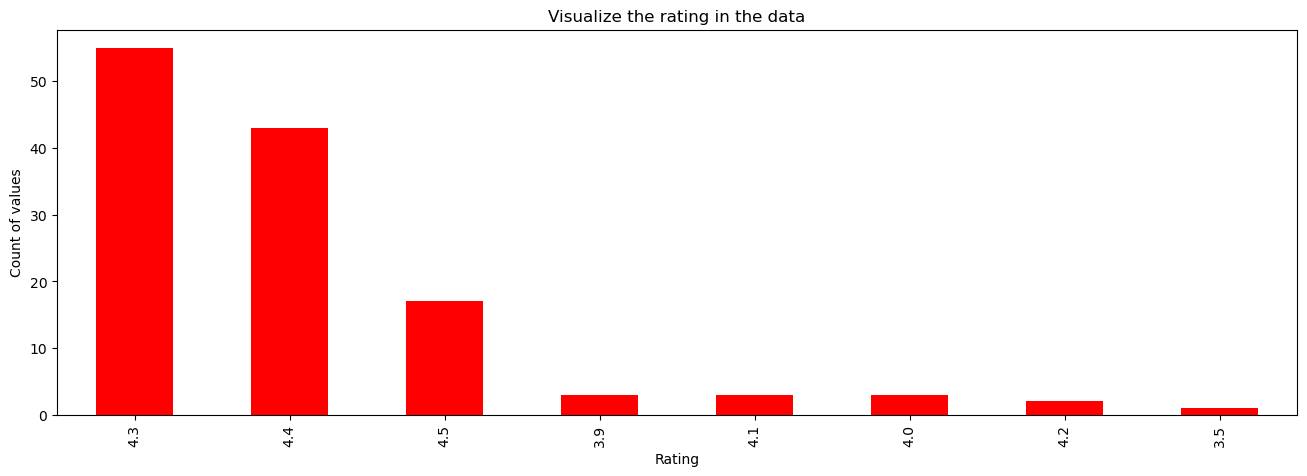

In [32]:
#Explore data analysis process with data
#Visualize the rating in the data
import matplotlib.pyplot as plt
import seaborn as sns
final_df['Rating'].value_counts().plot(kind='bar',title="Visualize the rating in the data",color='red',figsize=(16,5))
plt.xlabel("Rating")
plt.ylabel("Count of values")
plt.show()

### Observations:
- From the rating most of the 4.3 is the top rating. 3.5 is tge less rating in the data.
- The 4.4 is the second highest rating

In [33]:
#Covert the pricess object type to integer type
final_df['Prices']=final_df['Prices'].astype(int)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 0 to 23
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Mobile_Model  127 non-null    object 
 1   Prices        127 non-null    int32  
 2   Rating        127 non-null    float64
 3   RAM_ROM       127 non-null    object 
 4   RAM           121 non-null    object 
 5   ROM           121 non-null    object 
dtypes: float64(1), int32(1), object(4)
memory usage: 6.4+ KB


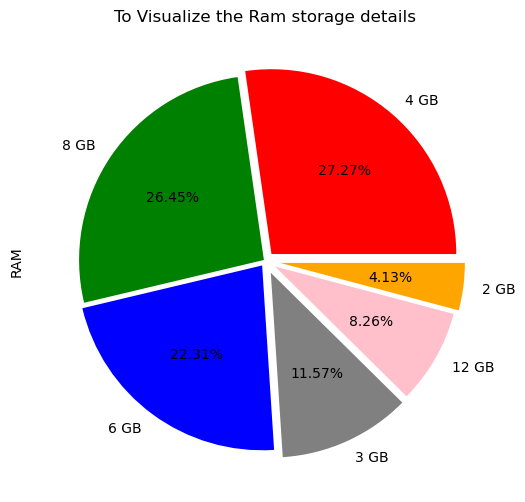

In [34]:
#Visualize the Ram values in the data set using the pie charts
final_df['RAM'].value_counts().plot(kind='pie',explode=[0.05,0.01,0.03,0.07,0.06,0.08],
    labels=['4 GB','8 GB','6 GB','3 GB','12 GB','2 GB'],
    colors=['red','green','blue','gray','pink','orange'],
    autopct='%1.2f%%',title='To Visualize the Ram storage details',figsize=(14,6))
plt.show()

### Observations:
- From the above chart most phone have 4 GB RAM
- 8 GB mobile are in the Second place
- What we observe most of the people look only 4 GB and 6 GB and 8 GB RAM.

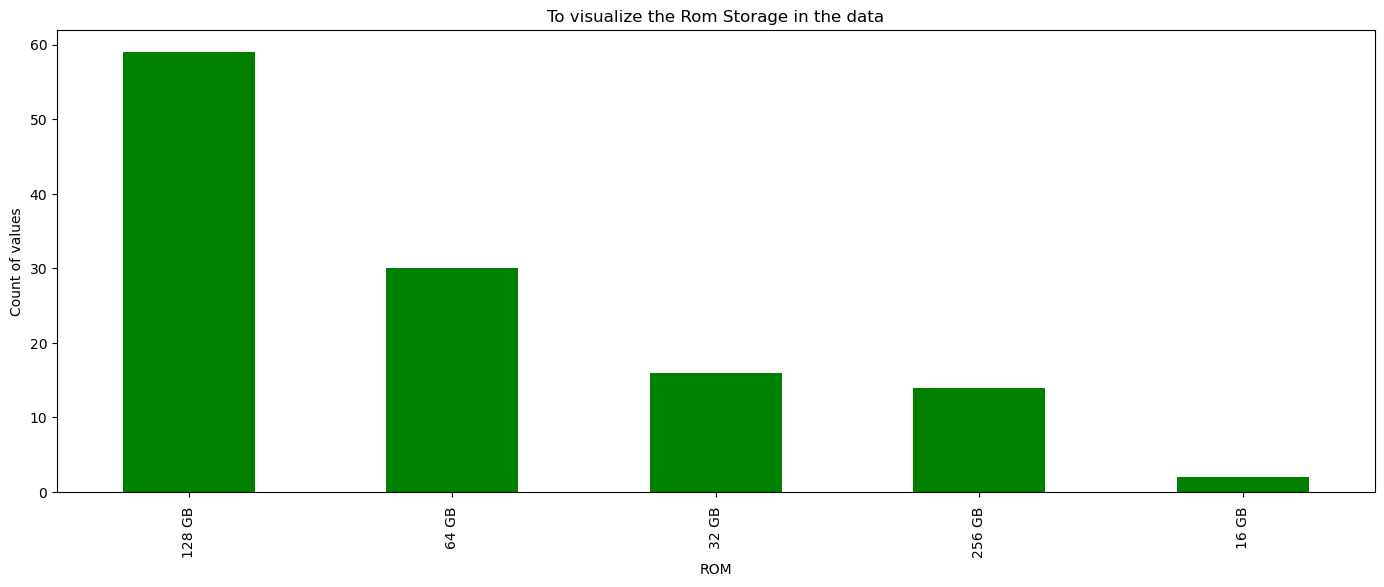

In [35]:
#Visualize the Rom storage in the 
final_df['ROM'].value_counts().plot(kind='bar',color='g',title="To visualize the Rom Storage in the data",figsize=(17,6))
plt.xlabel("ROM")
plt.ylabel("Count of values")
plt.show()

### Observations:
- From the above chart most phone have 128 GB storage and less number of phones have 16 GB storage
- Most of the mobile have 128 GB storage and 64 GB storage.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


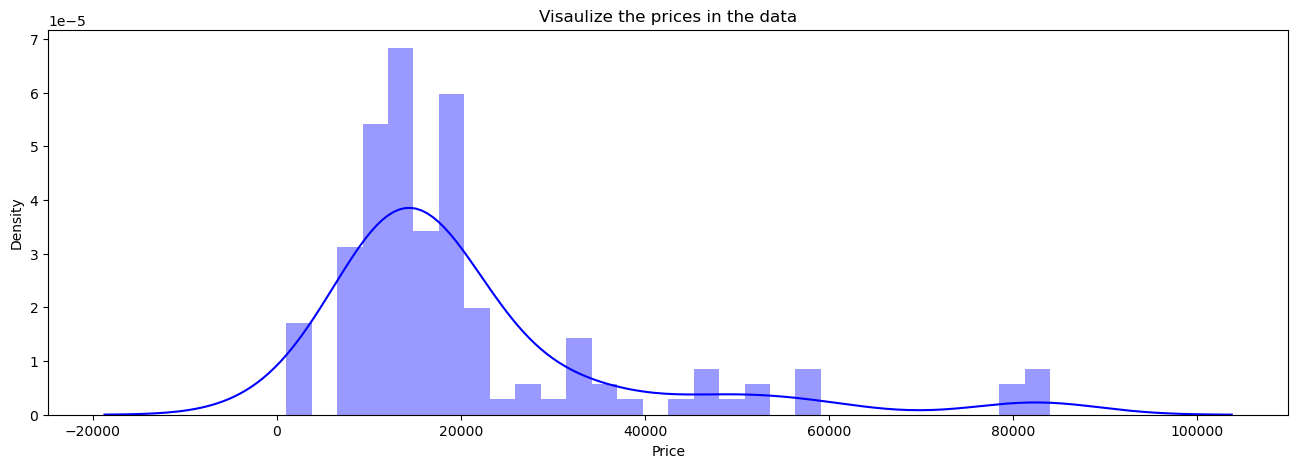

In [36]:
#Visualize the distribution of the prices column
plt.figure(figsize=(16,5))
sns.distplot(final_df['Prices'],kde=True,bins=30,color='b')
plt.title("Visaulize the prices in the data")
plt.xlabel("Price")
plt.show()

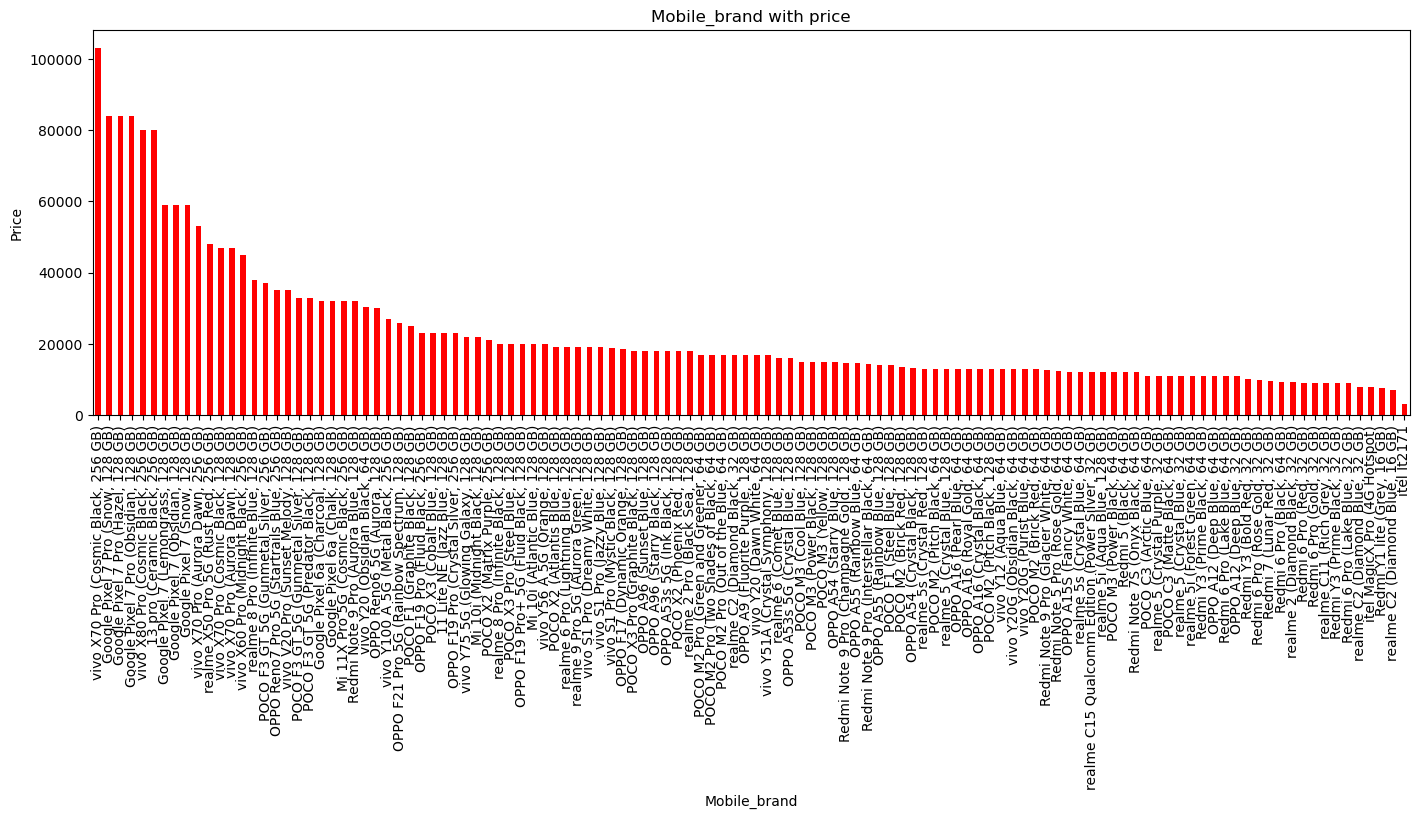

In [37]:
#Using the groupby function find the mobile brand with the pricess
final_df.groupby(['Mobile_Model'])['Prices'].sum()\
.sort_values(ascending=False)\
.plot(kind='bar',figsize=(17,5),color='r',title="Mobile_brand with price")
plt.xlabel("Mobile_brand")
plt.ylabel("Price")
plt.show()

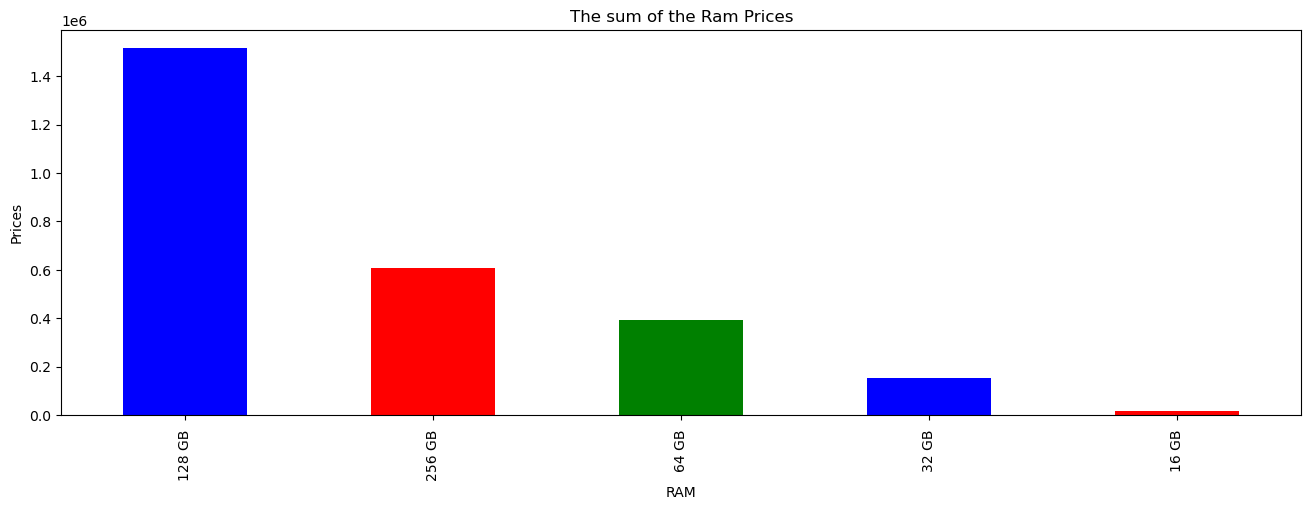

In [38]:
#To calculate the sum of the rom prices in the data
final_df.groupby(['ROM'])['Prices'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(16,5),title="The sum of the Ram Prices",color=['blue','red','green'])
plt.xlabel("RAM")
plt.ylabel("Prices")
plt.show()

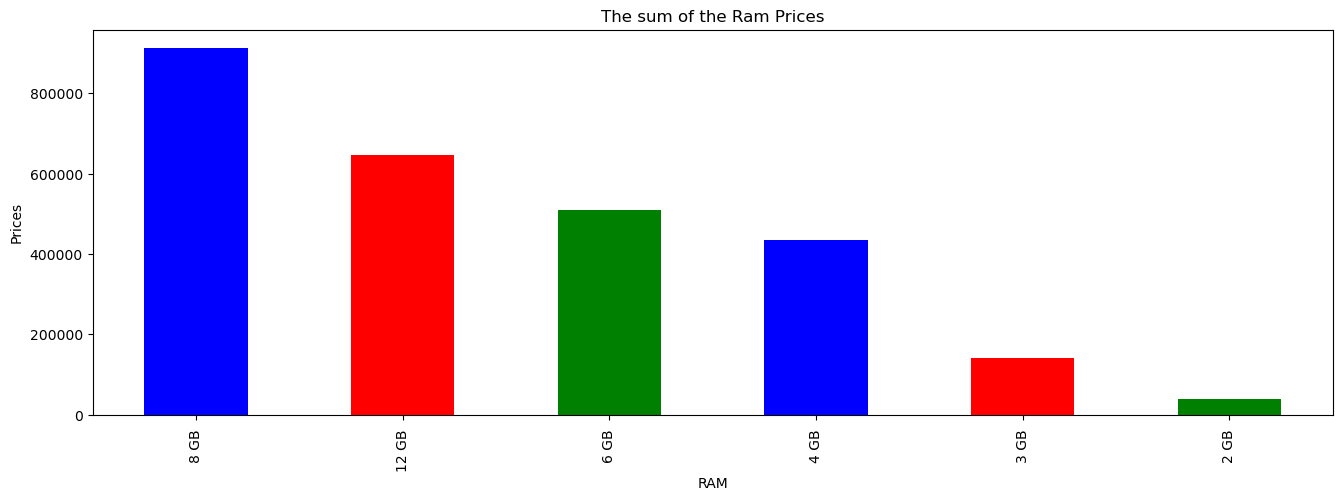

In [39]:
#To calculate the sum of the ram prices in the data
final_df.groupby(['RAM'])['Prices'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(16,5),title="The sum of the Ram Prices",color=['blue','red','green'])
plt.xlabel("RAM")
plt.ylabel("Prices")
plt.show()

### Observations:
- From the above chart we visualize the ram stograge with price wise
- 8 Gb storage of the mobile have the high pricess in the data and 2 GB storage mobile have less prices
- the first rom prices lies on 8,12,4,6 GB prices

In [40]:
final_df.drop('RAM_ROM',axis=1,inplace=True)

## Machine Learning Modeling we use the Regression Methods 

In [41]:
#install the all the required libraries for the machine learning model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [42]:
#Covert the all categorical columns into numerical 
label=LabelEncoder()
final_df['Mobile_Model']=label.fit_transform(final_df['Mobile_Model'])
final_df['RAM']=label.fit_transform(final_df['RAM'])
final_df['ROM']=label.fit_transform(final_df['ROM'])

In [43]:
#Create the independent and dependent variable into for machine learning and and normalize the the data
X=final_df.drop(['Prices'],axis=1)
y=final_df['Prices']
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [52]:
#import the data into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=120)
X_train.shape,y_train.shape

((95, 4), (95,))

In [53]:
#Create a  machine learning model for train and test 
import numpy as np
def model_buliding(model,X_train,X_test,y_train,y_test):
    #fit the train data to the model
    model.fit(X_train,y_train)
    # predict the test data for the model
    predicted=model.predict(X_test)
    #calculte the mean absolute_error,mean_squared_error,root_mean_squared
    print(f'the mean_absolute_error {mean_absolute_error(y_test, predicted)}')
    print(f'The mean_squared_error {mean_squared_error(y_test, predicted)}')
    rmse = np.sqrt(mean_squared_error(y_test, predicted))
    print(f'The RMSE socre {rmse}')
    r2_sqr=r2_score(y_test, predicted)
    N=len(y_test)
    k=4
    print(f'Adjusted_The root_mean_squared  {(1-r2_sqr)*(N-1)/(N-k-1)}')
#APply the LinearRegression model to the data
linear=LinearRegression()
model_buliding(linear,X_train,X_test,y_train,y_test)

the mean_absolute_error 12010.163456536253
The mean_squared_error 301303183.8212494
The RMSE socre 17358.086986221995
Adjusted_The root_mean_squared  0.9369859557564596


In [54]:
# Apply DecisionTreeRegressor model
Tree=DecisionTreeRegressor()
model_buliding(linear,X_train,X_test,y_train,y_test)

the mean_absolute_error 12010.163456536253
The mean_squared_error 301303183.8212494
The RMSE socre 17358.086986221995
Adjusted_The root_mean_squared  0.9369859557564596


In [55]:
# Apply RandomForestRegressor model
random=RandomForestRegressor()
model_buliding(random,X_train,X_test,y_train,y_test)

the mean_absolute_error 4672.901875
The mean_squared_error 75294893.75565
The RMSE socre 8677.26303367888
Adjusted_The root_mean_squared  0.2341503899642604


In [56]:
# Apply XGBRegressor model
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
xgb=XGBRegressor()
model_buliding(xgb,X_train,X_test,y_train,y_test)

the mean_absolute_error 4166.846893310547
The mean_squared_error 67508394.07794546
The RMSE socre 8216.349194012231
Adjusted_The root_mean_squared  0.2099361060327648


In [57]:
# Apply CatBoostRegressor model
cat=CatBoostRegressor(learning_rate=0.01,iterations=5)
model_buliding(cat,X_train,X_test,y_train,y_test)

0:	learn: 16365.0207034	total: 957us	remaining: 3.83ms
1:	learn: 16300.0688738	total: 5.54ms	remaining: 8.31ms
2:	learn: 16227.9664169	total: 7.5ms	remaining: 5ms
3:	learn: 16158.0646034	total: 9.46ms	remaining: 2.37ms
4:	learn: 16088.1569988	total: 10.9ms	remaining: 0us
the mean_absolute_error 12044.274717591348
The mean_squared_error 373194188.9291084
The RMSE socre 19318.234622478016
Adjusted_The root_mean_squared  1.1605510083290274


In [58]:
# Apply KNeighborsRegressor model
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
model_buliding(knn,X_train,X_test,y_train,y_test)

the mean_absolute_error 8492.35625
The mean_squared_error 178323161.12875
The RMSE socre 13353.769547537879
Adjusted_The root_mean_squared  0.5545454098581987


In [59]:
# Apply SVC model
from sklearn.svm import SVC
svc=SVC()
model_buliding(svc,X_train,X_test,y_train,y_test)

the mean_absolute_error 6882.875
The mean_squared_error 49906437.5
The RMSE socre 7064.448846159196
Adjusted_The root_mean_squared  0.1551979320174699


### conclusion:
- From the data linear regression and DecisionTreeregressor get good r2_score fo it
- And svc and knn get second good r2_score